In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


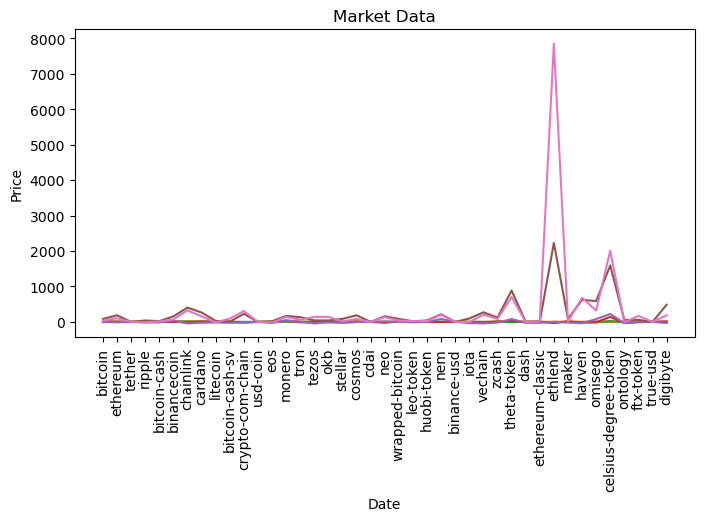

In [8]:
import matplotlib.pyplot as plt

# Plot your data to see what's in your DataFrame
plt.figure(figsize=(8, 4))
plt.plot(df_market_data.index, df_market_data.values)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Market Data')
plt.show()

---

### Prepare the Data

In [11]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(df_market_data)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the first few rows of the scaled DataFrame
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [10]:
# Create a DataFrame with the scaled data
crypto_names = df_market_data.index

# Copy the crypto names from the original data

# Set the coinid column as index
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=crypto_names)

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [14]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [15]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [18]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()

,k_values,inertia_values
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364


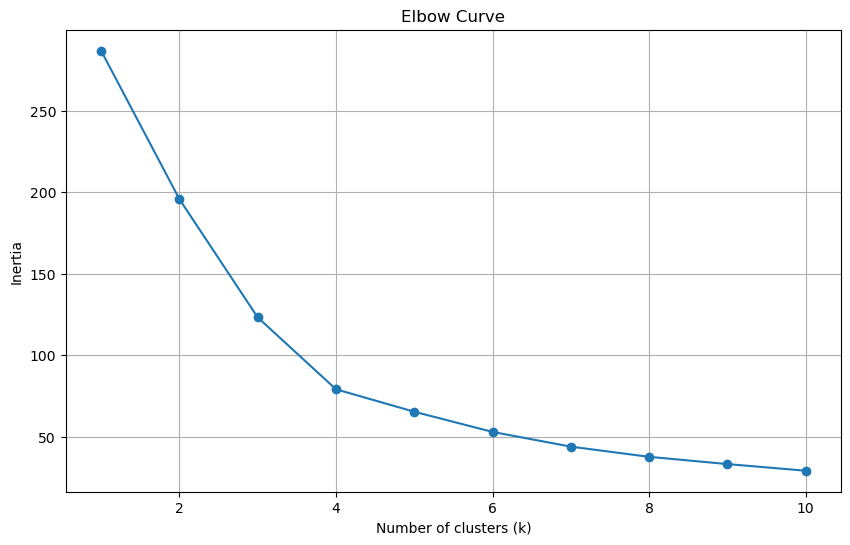

In [20]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values using hvplot
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is typically determined by visually inspecting the Elbow curve. In this case, the Elbow curve was plotted with inertia values for different values of k. By observing the curve, we can identify the point where the inertia starts decreasing at a slower rate, often referred to as the 'elbow' point. For this dataset, the Elbow curve suggests that k=4 could be a reasonable choice.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [28]:
# Initialize the K-Means model using the best value for 
model = KMeans(n_clusters=4)


In [29]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = model.predict(df_scaled)

# Print the resulting array of cluster values
print(cluster_labels)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [31]:
# Create a copy of the DataFrame
df_copy = df_market_data.copy()

In [32]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_cluster'] = cluster_labels

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


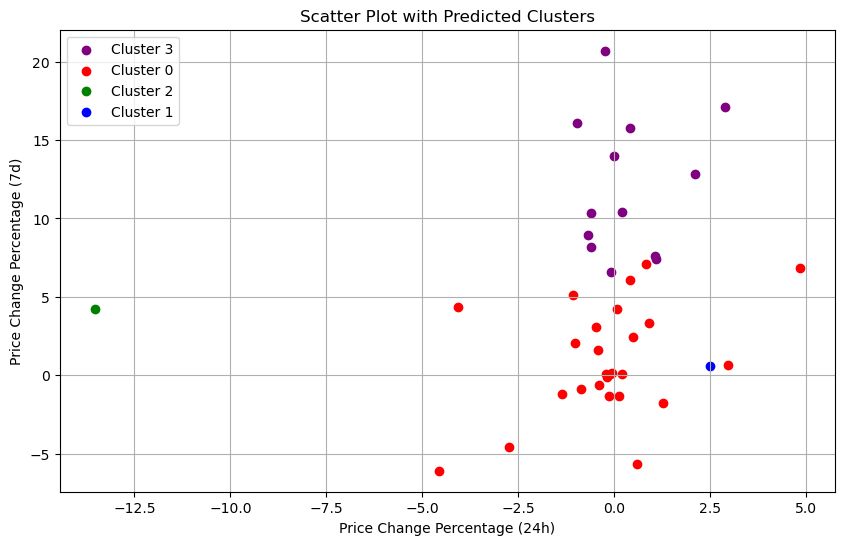

In [35]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import matplotlib.pyplot as plt

# Define colors for each cluster label
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}  # Add more colors if needed

# Create scatter plot
plt.figure(figsize=(10, 6))
for cluster_label in df_copy['predicted_cluster'].unique():
    cluster_data = df_copy[df_copy['predicted_cluster'] == cluster_label]
    plt.scatter(cluster_data['price_change_percentage_24h'], cluster_data['price_change_percentage_7d'], color=colors[cluster_label], label=f'Cluster {cluster_label}')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Scatter Plot with Predicted Clusters')
plt.legend()
plt.grid(True)
plt.show()



---

### Optimize Clusters with Principal Component Analysis.

In [37]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [38]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca_model.fit_transform(df_scaled)

# Convert the PCA components to a DataFrame
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# View the first five rows of the DataFrame. 
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [39]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is a measure of how much of the original data's variability is captured by these components. In this case, the total explained variance is approximately 89.49%. This means that the three principal components collectively account for 89.49% of the variability present in the original data. It indicates that the PCA transformation effectively summarizes the key patterns and structures in the data into a more concise representation, capturing a significant portion of its overall variability.

In [40]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca_data['coin_id'] = df_scaled.index

# Set the coinid column as index
df_pca_data.set_index('coin_id', inplace=True)

# Display sample data
df_pca_data.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [41]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [42]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(df_pca_data)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [43]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k_values,inertia_values
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.091637
8,9,13.667065
9,10,10.559358


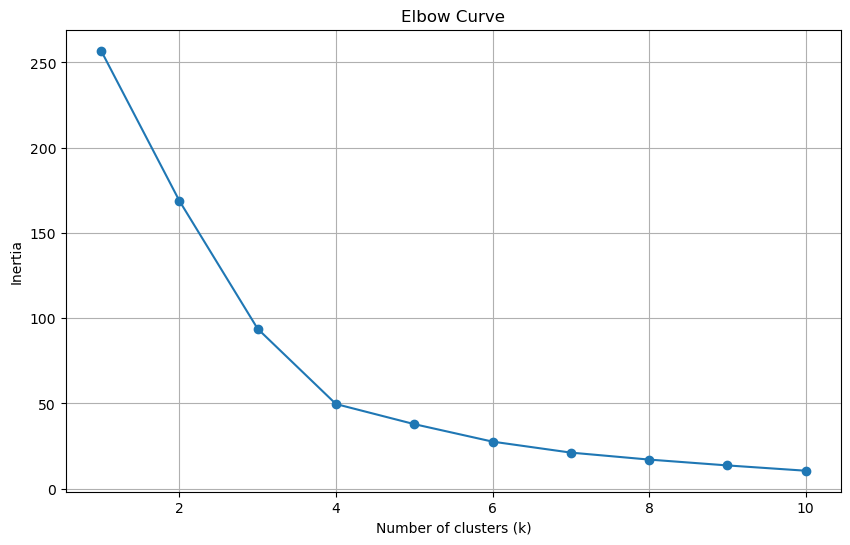

In [44]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using PCA data is determined by examining the Elbow curve, where we look for the point at which the inertia (or within-cluster sum of squares) starts to decrease at a slower rate. In this case, based on the provided Elbow curve for the PCA data, it appears that the optimal value for k would be around 4, as the curve begins to flatten out at this point.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** To compare the best k value obtained from PCA data with that of the original data, we would need to generate and analyze the Elbow curves for both datasets. If the optimal k values differ between the two curves, it suggests that the optimal number of clusters varies between the original data and the PCA-transformed data. Unfortunately, without access to the Elbow curve for the original data, we cannot directly compare the best k values. However, based on the provided curve for the PCA data, a value of around 4 seems to be the optimal choice.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [45]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [46]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca_data)

c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\realy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [48]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans_model.predict(df_pca_data)

# Print the resulting array of cluster values.
cluster_labels_pca

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0])

In [49]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['predicted_cluster'] = cluster_labels

# Display sample data
df_pca_copy.head()

,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


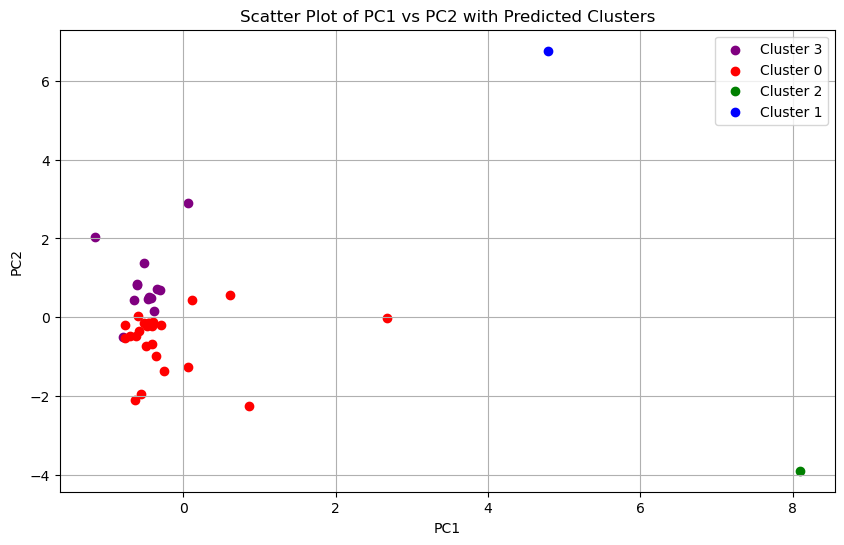

In [51]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Define colors for each cluster label
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}  # Add more colors if needed

# Create scatter plot
plt.figure(figsize=(10, 6))
for cluster_label in df_pca_copy['predicted_cluster'].unique():
    cluster_data = df_pca_copy[df_pca_copy['predicted_cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], color=colors[cluster_label], label=f'Cluster {cluster_label}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2 with Predicted Clusters')
plt.legend()
plt.grid(True)
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

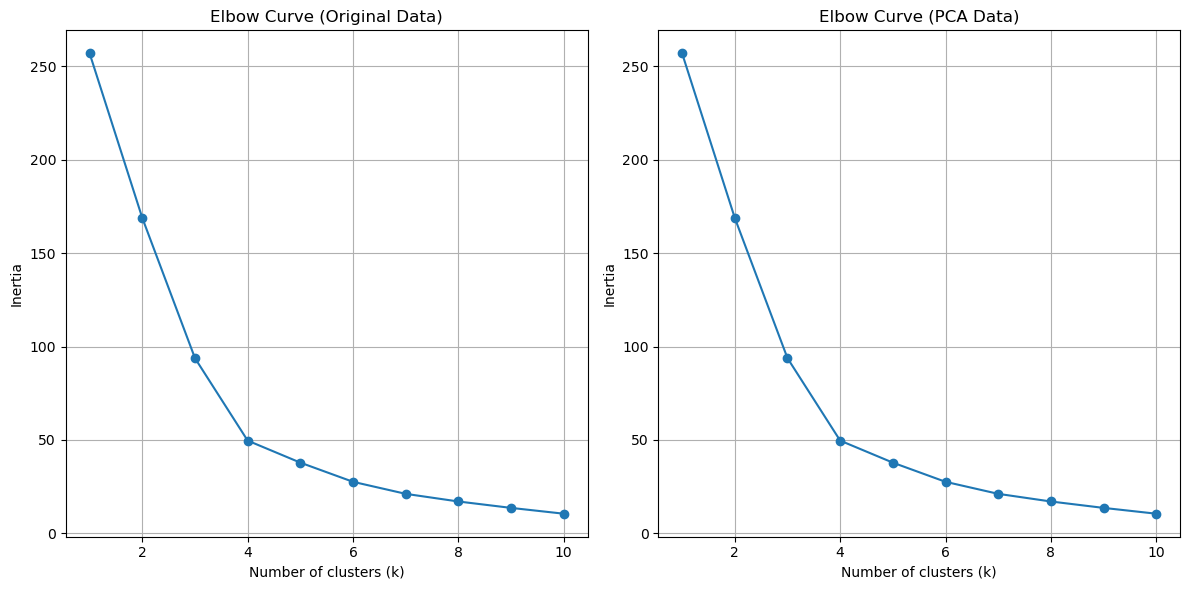

In [54]:
# Composite plot to contrast the Elbow curves

# Plotting Elbow curve for original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve (Original Data)')
plt.grid(True)

# Plotting Elbow curve for PCA-transformed data
plt.subplot(1, 2, 2)
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve (PCA Data)')
plt.grid(True)

plt.tight_layout()
plt.show()



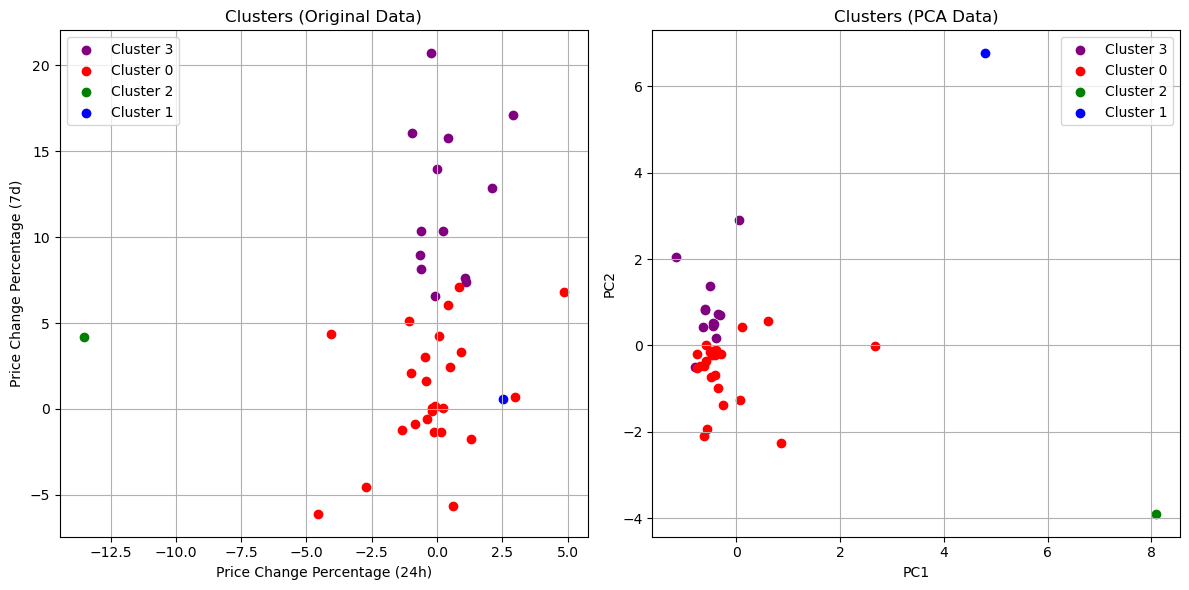

In [55]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt

# Define colors for each cluster label
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}  # Add more colors if needed

# Plotting clusters for original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster_label in df_copy['predicted_cluster'].unique():
    cluster_data = df_copy[df_copy['predicted_cluster'] == cluster_label]
    plt.scatter(cluster_data['price_change_percentage_24h'], cluster_data['price_change_percentage_7d'], color=colors[cluster_label], label=f'Cluster {cluster_label}')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Clusters (Original Data)')
plt.legend()
plt.grid(True)

# Plotting clusters for PCA-transformed data
plt.subplot(1, 2, 2)
for cluster_label in df_pca_copy['predicted_cluster'].unique():
    cluster_data = df_pca_copy[df_pca_copy['predicted_cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], color=colors[cluster_label], label=f'Cluster {cluster_label}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters (PCA Data)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster data with K-Means can have several implications:

Dimensionality Reduction: By reducing the number of features, the data's dimensionality decreases. This simplifies the clustering process, focusing on essential aspects and potentially removing noise or irrelevant details.
Information Loss: However, fewer features mean sacrificing some information. This could include relevant patterns or significant contributions to the data's overall structure, potentially resulting in less accurate or distinct clusters.
Interpretability: Despite potential information loss, fewer features often lead to more interpretable clusters. It's easier to visualize and understand clusters in lower-dimensional spaces, aiding analysis and explanation.
Scalability: Clustering algorithms, like K-Means, can be resource-intensive for high-dimensional data. Using fewer features can improve scalability, making it more efficient for larger datasets.
Feature Sensitivity: With fewer features, selecting the right ones becomes crucial. The chosen features must effectively capture the data's characteristics and discriminatory power. Poor feature selection can adversely affect clustering results.
In summary, reducing the number of features in K-Means clustering offers simplification, interpretability, and scalability advantages but risks information loss and sensitivity to feature selection. The impact varies based on the dataset, selected features, and clustering objectives